## <center><font color='green'>Explainable AI (XAI) with a Decision Tree [Regression]

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
from sklearn import tree 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#### <font color='purple'> Load dataset  

In [4]:
dataset = pd.read_csv("dataset/neonate_dataset.csv")

In [5]:
dataset.fillna(method="ffill", inplace=True)
y = dataset['LOS']
X = dataset.drop(['LOS'], axis=1)

In [6]:
selected_features_classification = [
     'temperature_mean',
     'respRate_std',
     'skinTemperature_std',
     'skinTemperature_var',
     'sao2_std',
     'heartRate_mean',
     'respRate_mean',
     'skinTemperature_mean',
     'bpCuffDiastolic_std',
     'BIRTH_WEIGHT',
     'bpCuffSystolic_mean',
     'bpCuffDiastolic_mean',
     'sao2_mean',
     'temperature_std',
     'temperature_var',
     'PLATELET',
     'D10W_MEAN', 'ADMISSION_LOCATION', 'INSURANCE', 'GESTATION', 'WHITE_BLOOD', 
     'DATEEVENTS', 'DW10_COUNT', 'PRESCRIPTIONS', 'HEAD_CIRC'] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [8]:
X_train_fs = X_train[selected_features_classification][:]
X_test_fs = X_test[selected_features_classification][:]

In [9]:
X_train_fs.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'ADMISSION_LOCATION': 'Admission Location',
           'INSURANCE': 'Insurance',
           'GESTATION': 'Gestational Age',     
           'DATEEVENTS': 'Date Events Count',  
           'WHITE_BLOOD': 'White Blood Count',  
           'PRESCRIPTIONS': 'Prescriptions Count',
           'HEAD_CIRC': 'Head Circumference',
           'D10W_MEAN': 'D10W Amount (mean)', 
           'DW10_COUNT': 'D10W Count'}, axis=1, inplace=True)

In [10]:
X_test_fs.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'ADMISSION_LOCATION': 'Admission Location',
           'INSURANCE': 'Insurance',
           'GESTATION': 'Gestational Age',     
           'DATEEVENTS': 'Date Events Count',  
           'WHITE_BLOOD': 'White Blood Count',  
           'PRESCRIPTIONS': 'Prescriptions Count',
           'HEAD_CIRC': 'Head Circumference',
           'D10W_MEAN': 'D10W Amount (mean)', 
           'DW10_COUNT': 'D10W Count'}, axis=1, inplace=True)

#### <font color='purple'> Model and Fit

In [14]:
model_dt =  DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)
model_cat = CatBoostRegressor(learning_rate=0.03, depth=5) 

model_dt.fit(X_train_fs, y_train)
model_cat.fit(X_train_fs, y_train)

0:	learn: 26.3485287	total: 66.5ms	remaining: 1m 6s
1:	learn: 25.8713690	total: 68ms	remaining: 33.9s
2:	learn: 25.4399702	total: 69.3ms	remaining: 23s
3:	learn: 24.9934135	total: 70.5ms	remaining: 17.5s
4:	learn: 24.6212289	total: 71.6ms	remaining: 14.3s
5:	learn: 24.2275992	total: 72.8ms	remaining: 12.1s
6:	learn: 23.8612470	total: 74ms	remaining: 10.5s
7:	learn: 23.4854433	total: 75.1ms	remaining: 9.31s
8:	learn: 23.1751801	total: 76.2ms	remaining: 8.39s
9:	learn: 22.8274627	total: 77.4ms	remaining: 7.66s
10:	learn: 22.4715985	total: 78.5ms	remaining: 7.06s
11:	learn: 22.1365671	total: 79.8ms	remaining: 6.57s
12:	learn: 21.8317933	total: 81ms	remaining: 6.15s
13:	learn: 21.5558714	total: 82.1ms	remaining: 5.79s
14:	learn: 21.2568209	total: 83.3ms	remaining: 5.47s
15:	learn: 20.9558172	total: 84.5ms	remaining: 5.2s
16:	learn: 20.6769604	total: 86.1ms	remaining: 4.98s
17:	learn: 20.3929650	total: 87.3ms	remaining: 4.76s
18:	learn: 20.1432546	total: 88.5ms	remaining: 4.57s
19:	learn: 1

277:	learn: 10.8208718	total: 398ms	remaining: 1.03s
278:	learn: 10.8170902	total: 399ms	remaining: 1.03s
279:	learn: 10.8101376	total: 400ms	remaining: 1.03s
280:	learn: 10.8050249	total: 402ms	remaining: 1.03s
281:	learn: 10.7969091	total: 403ms	remaining: 1.02s
282:	learn: 10.7936057	total: 404ms	remaining: 1.02s
283:	learn: 10.7818041	total: 405ms	remaining: 1.02s
284:	learn: 10.7759847	total: 406ms	remaining: 1.02s
285:	learn: 10.7671544	total: 408ms	remaining: 1.02s
286:	learn: 10.7626125	total: 409ms	remaining: 1.01s
287:	learn: 10.7560319	total: 410ms	remaining: 1.01s
288:	learn: 10.7506097	total: 411ms	remaining: 1.01s
289:	learn: 10.7421602	total: 413ms	remaining: 1.01s
290:	learn: 10.7276117	total: 414ms	remaining: 1.01s
291:	learn: 10.7216794	total: 415ms	remaining: 1.01s
292:	learn: 10.7125091	total: 416ms	remaining: 1s
293:	learn: 10.7090279	total: 418ms	remaining: 1s
294:	learn: 10.7016677	total: 419ms	remaining: 1s
295:	learn: 10.6940838	total: 420ms	remaining: 1000ms
2

554:	learn: 9.2388912	total: 728ms	remaining: 584ms
555:	learn: 9.2338625	total: 729ms	remaining: 582ms
556:	learn: 9.2307162	total: 731ms	remaining: 581ms
557:	learn: 9.2248299	total: 732ms	remaining: 580ms
558:	learn: 9.2192043	total: 733ms	remaining: 578ms
559:	learn: 9.2138964	total: 734ms	remaining: 577ms
560:	learn: 9.2104545	total: 735ms	remaining: 575ms
561:	learn: 9.2041346	total: 737ms	remaining: 574ms
562:	learn: 9.1987126	total: 738ms	remaining: 573ms
563:	learn: 9.1910546	total: 739ms	remaining: 571ms
564:	learn: 9.1834298	total: 740ms	remaining: 570ms
565:	learn: 9.1786982	total: 741ms	remaining: 568ms
566:	learn: 9.1728801	total: 743ms	remaining: 567ms
567:	learn: 9.1682089	total: 744ms	remaining: 566ms
568:	learn: 9.1659234	total: 745ms	remaining: 565ms
569:	learn: 9.1587729	total: 747ms	remaining: 564ms
570:	learn: 9.1554775	total: 748ms	remaining: 562ms
571:	learn: 9.1465697	total: 749ms	remaining: 561ms
572:	learn: 9.1425715	total: 751ms	remaining: 559ms
573:	learn: 

815:	learn: 8.0146751	total: 1.06s	remaining: 238ms
816:	learn: 8.0091736	total: 1.06s	remaining: 237ms
817:	learn: 8.0051648	total: 1.06s	remaining: 236ms
818:	learn: 8.0037632	total: 1.06s	remaining: 235ms
819:	learn: 8.0005616	total: 1.06s	remaining: 233ms
820:	learn: 7.9990154	total: 1.06s	remaining: 232ms
821:	learn: 7.9984684	total: 1.06s	remaining: 231ms
822:	learn: 7.9934971	total: 1.06s	remaining: 229ms
823:	learn: 7.9908442	total: 1.07s	remaining: 228ms
824:	learn: 7.9892876	total: 1.07s	remaining: 227ms
825:	learn: 7.9862125	total: 1.07s	remaining: 225ms
826:	learn: 7.9832284	total: 1.07s	remaining: 224ms
827:	learn: 7.9789298	total: 1.07s	remaining: 223ms
828:	learn: 7.9732126	total: 1.07s	remaining: 221ms
829:	learn: 7.9691722	total: 1.07s	remaining: 220ms
830:	learn: 7.9659392	total: 1.07s	remaining: 219ms
831:	learn: 7.9625811	total: 1.08s	remaining: 217ms
832:	learn: 7.9566683	total: 1.08s	remaining: 216ms
833:	learn: 7.9540749	total: 1.08s	remaining: 215ms
834:	learn: 

In [12]:
model_dt.score(X_test_fs, y_test)

0.6710631666017117

In [15]:
model_cat.score(X_test_fs, y_test)

0.7851036377810177

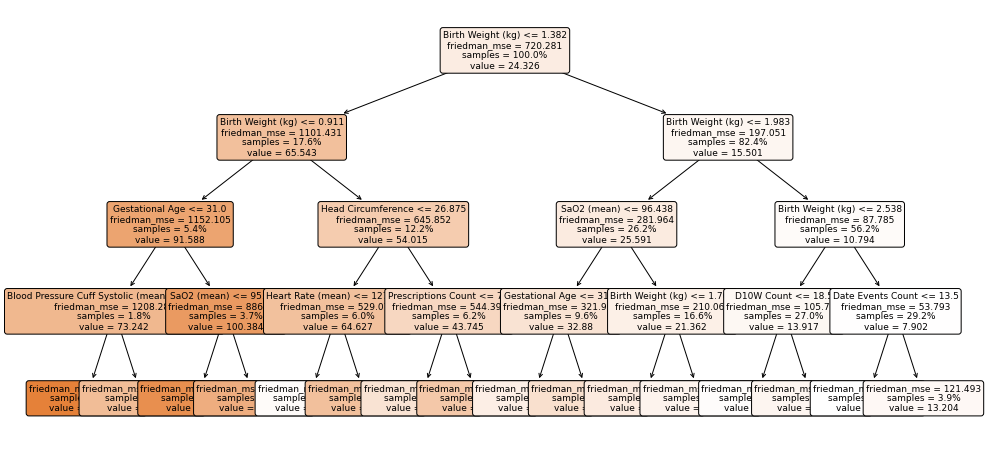

In [16]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(model_dt, feature_names = X_train_fs.columns, 
                     max_depth=5, fontsize=9, proportion=True, filled=True, rounded=True)

### <font color='purple'> Decision Tree surrogate model

In [17]:
model_cat = CatBoostRegressor(learning_rate=0.03, depth=5)
model_cat.fit(X_train_fs, y_train) 

0:	learn: 26.3485287	total: 1.55ms	remaining: 1.55s
1:	learn: 25.8713690	total: 3.02ms	remaining: 1.51s
2:	learn: 25.4399702	total: 4.49ms	remaining: 1.49s
3:	learn: 24.9934135	total: 5.72ms	remaining: 1.42s
4:	learn: 24.6212289	total: 7.12ms	remaining: 1.42s
5:	learn: 24.2275992	total: 8.71ms	remaining: 1.44s
6:	learn: 23.8612470	total: 10.2ms	remaining: 1.45s
7:	learn: 23.4854433	total: 11.6ms	remaining: 1.44s
8:	learn: 23.1751801	total: 12.8ms	remaining: 1.41s
9:	learn: 22.8274627	total: 14ms	remaining: 1.38s
10:	learn: 22.4715985	total: 15.1ms	remaining: 1.36s
11:	learn: 22.1365671	total: 16.3ms	remaining: 1.34s
12:	learn: 21.8317933	total: 17.4ms	remaining: 1.32s
13:	learn: 21.5558714	total: 18.6ms	remaining: 1.31s
14:	learn: 21.2568209	total: 19.7ms	remaining: 1.29s
15:	learn: 20.9558172	total: 20.8ms	remaining: 1.28s
16:	learn: 20.6769604	total: 22.2ms	remaining: 1.28s
17:	learn: 20.3929650	total: 23.4ms	remaining: 1.28s
18:	learn: 20.1432546	total: 24.6ms	remaining: 1.27s
19:	l

264:	learn: 10.9165611	total: 321ms	remaining: 891ms
265:	learn: 10.9082701	total: 323ms	remaining: 891ms
266:	learn: 10.9031325	total: 324ms	remaining: 890ms
267:	learn: 10.8899799	total: 325ms	remaining: 889ms
268:	learn: 10.8852928	total: 327ms	remaining: 888ms
269:	learn: 10.8785961	total: 328ms	remaining: 887ms
270:	learn: 10.8685573	total: 329ms	remaining: 885ms
271:	learn: 10.8643062	total: 330ms	remaining: 884ms
272:	learn: 10.8559118	total: 331ms	remaining: 883ms
273:	learn: 10.8494148	total: 333ms	remaining: 881ms
274:	learn: 10.8404429	total: 334ms	remaining: 880ms
275:	learn: 10.8353462	total: 335ms	remaining: 879ms
276:	learn: 10.8271192	total: 336ms	remaining: 878ms
277:	learn: 10.8208718	total: 337ms	remaining: 876ms
278:	learn: 10.8170902	total: 339ms	remaining: 875ms
279:	learn: 10.8101376	total: 340ms	remaining: 874ms
280:	learn: 10.8050249	total: 341ms	remaining: 873ms
281:	learn: 10.7969091	total: 343ms	remaining: 872ms
282:	learn: 10.7936057	total: 344ms	remaining:

544:	learn: 9.2939124	total: 650ms	remaining: 543ms
545:	learn: 9.2909583	total: 651ms	remaining: 541ms
546:	learn: 9.2870730	total: 652ms	remaining: 540ms
547:	learn: 9.2834783	total: 654ms	remaining: 539ms
548:	learn: 9.2783786	total: 655ms	remaining: 538ms
549:	learn: 9.2723474	total: 656ms	remaining: 537ms
550:	learn: 9.2675475	total: 658ms	remaining: 536ms
551:	learn: 9.2587759	total: 659ms	remaining: 535ms
552:	learn: 9.2522588	total: 660ms	remaining: 533ms
553:	learn: 9.2448071	total: 661ms	remaining: 532ms
554:	learn: 9.2388912	total: 662ms	remaining: 531ms
555:	learn: 9.2338625	total: 664ms	remaining: 530ms
556:	learn: 9.2307162	total: 665ms	remaining: 529ms
557:	learn: 9.2248299	total: 666ms	remaining: 528ms
558:	learn: 9.2192043	total: 668ms	remaining: 527ms
559:	learn: 9.2138964	total: 670ms	remaining: 526ms
560:	learn: 9.2104545	total: 671ms	remaining: 525ms
561:	learn: 9.2041346	total: 673ms	remaining: 524ms
562:	learn: 9.1987126	total: 674ms	remaining: 523ms
563:	learn: 

765:	learn: 8.2248083	total: 972ms	remaining: 297ms
766:	learn: 8.2177007	total: 973ms	remaining: 296ms
767:	learn: 8.2127621	total: 974ms	remaining: 294ms
768:	learn: 8.2062370	total: 976ms	remaining: 293ms
769:	learn: 8.2029957	total: 977ms	remaining: 292ms
770:	learn: 8.2007479	total: 978ms	remaining: 290ms
771:	learn: 8.1977297	total: 979ms	remaining: 289ms
772:	learn: 8.1936553	total: 980ms	remaining: 288ms
773:	learn: 8.1900020	total: 982ms	remaining: 287ms
774:	learn: 8.1883729	total: 983ms	remaining: 285ms
775:	learn: 8.1848786	total: 985ms	remaining: 284ms
776:	learn: 8.1833412	total: 986ms	remaining: 283ms
777:	learn: 8.1789363	total: 987ms	remaining: 282ms
778:	learn: 8.1729214	total: 989ms	remaining: 281ms
779:	learn: 8.1674112	total: 990ms	remaining: 279ms
780:	learn: 8.1616284	total: 992ms	remaining: 278ms
781:	learn: 8.1590455	total: 993ms	remaining: 277ms
782:	learn: 8.1509913	total: 994ms	remaining: 276ms
783:	learn: 8.1491104	total: 996ms	remaining: 274ms
784:	learn: 

999:	learn: 7.3484656	total: 1.29s	remaining: 0us


In [18]:
print(f'CatBoost Regressor r-square: {round(model_cat.score(X_test_fs, y_test), 3)}')

CatBoost Regressor r-square: 0.785


In [19]:
predictions = model_cat.predict(X_test_fs)

In [20]:
cls_t = tree.DecisionTreeRegressor()
cls_t.fit(X_test_fs, predictions);

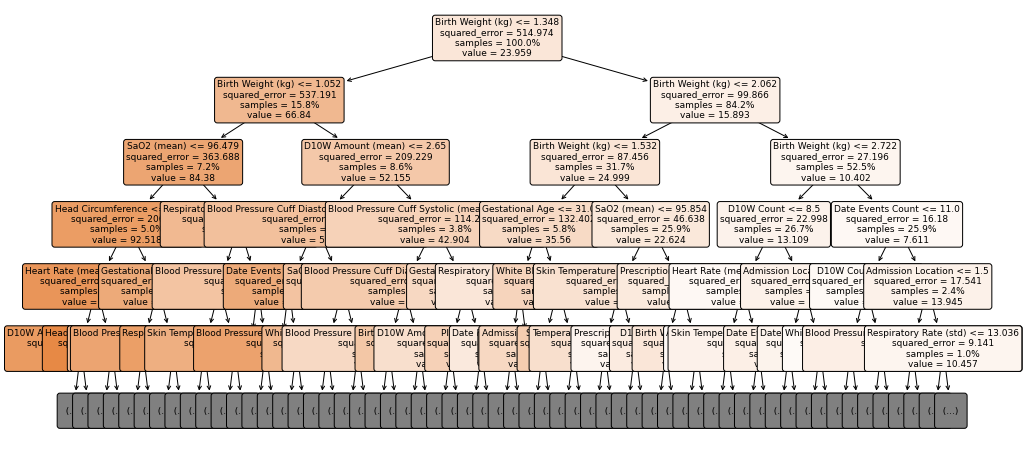

In [22]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, feature_names = X_test_fs.columns, 
                     max_depth=5, fontsize=9, proportion=True, filled=True, rounded=True)

plt.savefig('regression_tree_output.svg', format='svg')